In [6]:
!pwd

/Users/michaelmainzer/Documents/GA/DSI/mike1/02-lessons/week-04/4.0-morning-exercise/code/starter-code


In [7]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm

In [31]:
# This dataset you have seen, but this time we will properly split the data from the actual
# dataset into two, and fit the model on the train dataset, and test on the test dataset.
# Then we will iterate through class thresholds, to see which threshold gives the best confusion
# matrix. The first steps have been done for you 
# (creating dummies, joining to df, creating y series and features only dataframe 
# but please be familiar with these first steps! 

df_raw = pd.read_csv("/Users/michaelmainzer/Documents/GA/DSI/mike1/02-lessons/week-04/4.0-morning-exercise/assets/admissions.csv")
df = df_raw.dropna() 

dummies = pd.get_dummies( df["prestige"], prefix = "prestige" )

print df.head()

join = df[ df.columns[0:3] ].join(dummies)
join["intercept"] = 1

joinColumns = join.columns
y = join.admit
X = join[ joinColumns[1:3] + joinColumns[4:] ]
print join.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0  \
0      0  380.0  3.61           0.0           0.0           1.0           0.0   
1      1  660.0  3.67           0.0           0.0           1.0           0.0   
2      1  800.0  4.00           1.0           0.0           0.0           0.0   
3      1  640.0  3.19           0.0           0.0           0.0           1.0   
4      0  520.0  2.93           0.0           0.0           0.0           1.0   

   intercept  
0          1  
1          1  
2          1  
3          1  
4          1  


/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: using '+' to provide set union with Indexes is deprecated, use '|' or .union()


In [9]:
# split data randomly into datasets, 70% train, 30% test using test train split
# HINT: X_train, X_test, y_train, y_test = train_test_split( parameters )
# call them X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.3, random_state=30 )

In [11]:
# fit the model using statsmodels.api.sm
# HINT: sm.logit(y_train, X_train) then fit it

logit = sm.Logit(y_train, X_train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.567931
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  277
Model:                          Logit   Df Residuals:                      271
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 Jun 2016   Pseudo R-squ.:                 0.09148
Time:                        11:37:37   Log-Likelihood:                -157.32
converged:                       True   LL-Null:                       -173.16
                                        LLR p-value:                 6.873e-06
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gpa              0.9387      0.401      2.342      0.019         0.153     1.724
gre              0.0024      0.001      1.805      0.071        -0.000     0.005
intercept       -4.6529      1.349     -3.450      0.001        -7.296    -2.010
prestige_2.0    -0.5204      0.379     -1.374      0.169        -1.263     0.222
prestige_3.0    -1.2389      0.414     -2.996      0.003        -2.050    -0.428
prestige_4.0    -1.4674      0.527     -2.782      0.005        -2.501    -0.434
================================================================================
"""

In [27]:
#This gives you the change in odds for admission for every change in a unit of your x variables
#Anything above 1 helps, anything below 1 actually hurts our odds
np.exp(result.params)

gpa             2.556585
gre             1.002400
intercept       0.009534
prestige_2.0    0.594311
prestige_3.0    0.289693
prestige_4.0    0.230531
dtype: float64

In [29]:
conf = result.conf_int()
conf['original'] = result.params
conf.columns = ['2.5%','97.5%', 'original']
conf

,2.5%,97.5%,original
gpa,0.153066,1.724279,0.938672
gre,-0.000206,0.005000,0.002397
intercept,-7.296296,-2.009571,-4.652933
prestige_2.0,-1.262577,0.221870,-0.520353
prestige_3.0,-2.049552,-0.428312,-1.238932
prestige_4.0,-2.501120,-0.433619,-1.467369


In [30]:
np.exp(conf)

,2.5%,97.5%,original
gpa,1.165402,5.608475,2.556585
gre,0.999794,1.005013,1.002400
intercept,0.000678,0.134046,0.009534
prestige_2.0,0.282924,1.248409,0.594311
prestige_3.0,0.128793,0.651608,0.289693
prestige_4.0,0.081993,0.648159,0.230531


    *Each coefficient is the 'natural log' of the odds ratio for that variable

    *The gpa coefficient is e(2.71)^0.9387 = 2.6, so for every increase in a unit of gpa, your odds increase by 2.6

    *Our intercept is negative because that's the starting point for your odds to gain admission. And since the school admits way less people than apply, your odds are slim at the start. Those are the odds you have to basically overcome in order to gain admission.


In [20]:
import seaborn as sns
%matplotlib inline

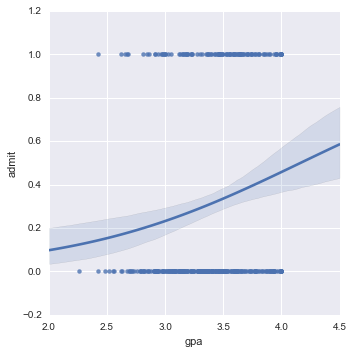

In [21]:
sns.lmplot(x='gpa', y='admit', data=join, logistic=True)

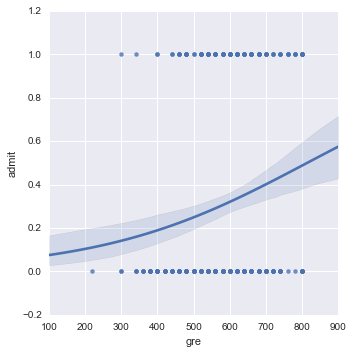

In [22]:
sns.lmplot(x='gre', y='admit', data=join, logistic=True)

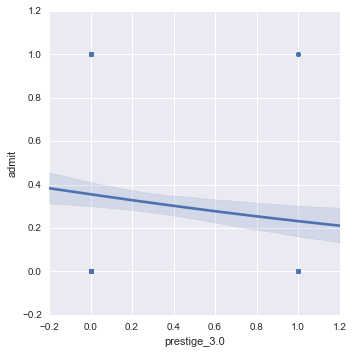

In [24]:
sns.lmplot(x='prestige_3.0', y='admit', data=join, logistic=True)

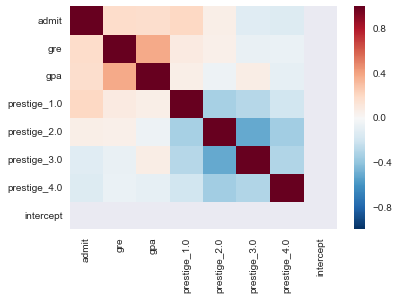

In [25]:
sns.heatmap(join.corr())

In [26]:
join.corr()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0,intercept
admit,1.000000,0.181202,0.174116,0.204689,0.067459,-0.122302,-0.133859,NaN
gre,0.181202,1.000000,0.382408,0.088277,0.058454,-0.074380,-0.069046,NaN
gpa,0.174116,0.382408,1.000000,0.068304,-0.050507,0.070881,-0.087671,NaN
prestige_1.0,0.204689,0.088277,0.068304,1.000000,-0.328493,-0.282120,-0.191989,NaN
prestige_2.0,0.067459,0.058454,-0.050507,-0.328493,1.000000,-0.510469,-0.347385,NaN
prestige_3.0,-0.122302,-0.074380,0.070881,-0.282120,-0.510469,1.000000,-0.298345,NaN
prestige_4.0,-0.133859,-0.069046,-0.087671,-0.191989,-0.347385,-0.298345,1.000000,NaN
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# add y_test as a new column in X_test, and then make another dataframe called dfTrain
# and set it equal to X_test, after X_test has the new y_test column
# HINT: X_test["actualAdmit"] = y_test

# create a new column in dfTrain that is the predicted admitance value using the result logit model
# note you will need a dataframe with only the features (including intercept)
# note the dummy column has already been removed

# HINT: 
#dfTrain['predictedAdmit'] = result.predict( dfTrain[ listOfFeatureCols ] )

In [ ]:
# create a function call scalePredictor, that will take two parameters called "prob" and "threshold"
# the function will check if the probability is greater than or equal to the threshold, 
# return 1 if true, else return 0

# create a while loop, starting at i = 0.30 and ending i <= 0.50, in increments of 0.01. 
# In this while loop you will create a new predictionAdmit_Threshold column in every iteration
# this column will be populated by using scalePredictor each time
# after the new column is populated, print out a confusion matrix (use crosstab (within the loop!) )
# note the first parameter in crosstab will always be dfTrain['actualAdmit'] while the second
# parameter will be the new column in that iteration
# interpret each iteration, and decide on the best threshold in each iteration.

# HINTS:

#i = 0.30
#while i <= 0.50:
    
#    dfTrain[ 'predictedAdmit_{}'.format(i) ] = finish code here
    
#    print pd.crosstab(
#        dfTrain['actualAdmit'],
#        put new dfTrain column here, 
#        rownames=['admit']
#    )
#    i += 0.01